## Least Squared Linear Regression

Generate random data for the model:
$$y=\beta_{0}+\beta_{1}x_1+\dots+\beta_{n}x_n+e$$
where $e\sim N(0,\sigma^{2})$

In [20]:
%matplotlib notebook
import numpy as np
import time

nsample = 200
nvariables=10
X0 = np.ones([nsample,1]) #the firt column are ones for the beta_0
X1 = np.random.uniform(0,10,([nsample,nvariables]))
X = np.concatenate([X0, X1],axis=1)
beta=np.random.randint(-10,10,size=([nvariables+1,1]));beta
error=np.random.normal(0,1,(nsample,1))#normal random error
Y=np.dot(X,beta)+error
print(beta)
#error=np.random.normal(0,1,(nsample,1))#normal random error
#Y=X*beta+error

[[ 1]
 [-3]
 [-2]
 [-3]
 [-7]
 [-3]
 [-4]
 [-6]
 [-3]
 [ 3]
 [-5]]


We can plot with respect to any of the variables:

(<matplotlib.collections.PathCollection at 0x7f728d04e250>,
 <matplotlib.text.Text at 0x7f729c05b3d0>)

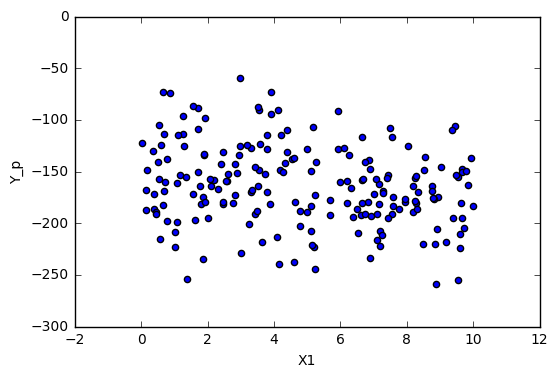

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
Y_p=np.array(Y)#convert to array for ploting
plt.scatter(X[:,1], Y_p),plt.xlabel('X1'),plt.ylabel('Y_p')

Fit a linear relation between a set of variables ($X$) with respect to a response variable ($y$)

Model: $y = X\beta + u$

Classical estimation: least squares

  \begin{align*}
\text{minimize}\quad & ||y-X\beta||_2^2
\end{align*}

The exact solution is: $\beta_{ls}=(X^T X)^{-1}X^T y$

In [22]:
time_start = time.clock()
beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print(beta_ls_exact)

('time elapsed=', 0.08814100000000735)
[[ 0.7739627 ]
 [-3.02177795]
 [-2.00462966]
 [-3.0110042 ]
 [-6.97775301]
 [-2.98747174]
 [-3.98113023]
 [-5.96987463]
 [-2.99936563]
 [ 3.03764172]
 [-5.02089235]]


We now compute the least squares problem:

In [23]:
from scipy.optimize import minimize

#Function
def least_sq_reg(beta_ls, X, Y):
    beta_ls = np.matrix(beta_ls)
    z = Y - X*np.transpose(beta_ls)
    return np.dot(np.transpose(z),z)


beta_ls0 = np.zeros(nvariables+1) #start up point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method='Nelder-Mead', options ={'disp': True,'xtol': 1e-10} )
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))

('time elapsed=', 0.09467599999999265)
[ 15.25782805  -7.74163365  -4.08393735  -8.1852843   -8.91564985
   4.19631701  -2.11208351  -8.14126692  -1.03460503  -2.89912535
   6.02206393]
('error=', 1.6678540941874604)


We can use method that automatically computes the gradient:

In [24]:
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method='Powell', options ={'disp': True} )
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)

print(res.x)
# print(res.hess_inv)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))

Optimization terminated successfully.
         Current function value: 164.607837
         Iterations: 30
         Function evaluations: 3178
('time elapsed=', 0.26028699999999105)
[[ 0.77466829 -3.02180887 -2.00466423 -3.01091098 -6.97787116 -2.98748689
  -3.98116682 -5.96988741 -2.99938366  3.03760816 -5.02083051]]
('error=', 5.4959773324588875e-05)


Or introduce ourselves the gradient and hessian information:

In [30]:
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls = np.matrix(beta_ls)
    pp = -2 * np.dot(np.transpose(Y- np.dot(X, np.transpose(beta_ls))), X)
    return np.squeeze(np.asarray(pp))

def least_sq_reg_hess(beta_ls,X,Y):
    return 2 * np.dot(np.transpose(X), X)


time_start = time.clock()
#run your code
                   
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method='Newton-CG', jac = least_sq_reg_der, hess = least_sq_reg_hess, options ={'disp': True} )
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))
   

Optimization terminated successfully.
         Current function value: 164.607798
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 27
         Hessian evaluations: 13
('time elapsed=', 0.026516000000000872)
[ 0.77292949 -3.02175973 -2.00461704 -3.0109838  -6.97772758 -2.98745016
 -3.98110649 -5.969853   -2.99935481  3.03766835 -5.02087269]
('error=', 7.818132858708727e-05)


## Lasso Regression

$L_1$ regularization: sparse solutions

  \begin{align*}
\text{minimize}\quad & ||y-X\beta||_2^2 + \rho ||\beta||_1
\end{align*}

No explicit solution

Lets try to formulate it directly:



In [4]:


def lasso_reg_brute(beta_lb,X,Y,rho):
    ########################################3

beta_lb0 = np.zeros(nvariables+1)
rho=1

time_start = time.clock()
res = #####################################################
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print(res.x)

IndentationError: expected an indented block (<ipython-input-4-9e1622fed69b>, line 6)

Non-differentiable problem. Equivalent (differentiable) formulation:
\begin{align*}
\text{minimize}_{t,\beta}\quad & ||y-X\beta||_2^2 + \rho t^T e \\
\text{subject to}\quad  & -t\leq \beta \leq t \\
\quad & t\geq 0
\end{align*}

In [23]:
#definition of the objective function
def lasso_reg(x,X,Y,rho):    
    (a,b)=X.shape
    b_reg=np.matrix(x[0:b]) #lasso coeficient equivalent to '\beta'
    b_lasso=np.matrix(x[b:2*b]) #Regression coefficients equivalent to 't'
    z=Y-X*np.transpose(b_reg)
    return np.transpose(z)*z+rho*np.sum(b_lasso)  

(a,b)=X.shape
cons = ({'type': 'ineq','fun' : lambda x: x[0:b]+x[b:2*b]},
        {'type': 'ineq','fun' : lambda x: -x[0:b]+x[b:2*b]},    
        {'type': 'ineq','fun' : lambda x: x[b:2*b]})
rho=1
#x0=([0, 0, 0, 0, 0, 0, 0, 0])
x0=np.zeros(2*(nvariables+1))
time_start = time.clock()
res = minimize(lasso_reg,x0, args=(X,Y,rho), method='SLSQP',constraints=cons, options={'disp': True,'ftol': 1e-10})
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x[0:b]) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: [[ 111.00421182]]
            Iterations: 31
            Function evaluations: 482
            Gradient evaluations: 30
time elapsed= 0.05259774917442428
[ 0.70001576  7.00692824 -1.95515849 -3.00719859 -2.97505986  3.98870702]
